In [1]:
# restore variables from Data-Frame-Spring-2017(Scores,LOC,Survey,D3).ipynb

%store -r bogota0
%store -r bogota1
%store -r bogota2
%store -r bogota3

# restore variables from Functional-Basic-Preprocessing.ipynb

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5

%store -r df1
%store -r df2
%store -r df3
%store -r df4

%store -r df1_bogota0
%store -r df2_bogota0
%store -r df3_bogota0
%store -r df4_bogota0

%store -r df1_bogota1
%store -r df2_bogota1
%store -r df3_bogota1
%store -r df4_bogota1

%store -r df1_bogota2
%store -r df2_bogota2
%store -r df3_bogota2
%store -r df4_bogota2

# restore variables to be used in template similarity with best score

%store -r phase1_group0
%store -r phase1_group1
%store -r phase1_group2
%store -r phase1_group3

%store -r phase2_group0
%store -r phase2_group1
%store -r phase2_group2
%store -r phase2_group3

%store -r phase3_group0
%store -r phase3_group1
%store -r phase3_group2
%store -r phase3_group3

%store -r phase4_group0
%store -r phase4_group1
%store -r phase4_group2
%store -r phase4_group3

%store -r phase5_group0
%store -r phase5_group1
%store -r phase5_group2
%store -r phase5_group3

# restore variables to be used in correlation plot between best and template similarity

%store -r mean_log_template_bogota0
%store -r mean_log_template_bogota1
%store -r mean_log_template_bogota2
%store -r mean_log_template_bogota3

%store -r median_log_template_bogota0
%store -r median_log_template_bogota1
%store -r median_log_template_bogota2
%store -r median_log_template_bogota3

# load the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inspect
from scipy.stats import ttest_ind

## Performance Distance from the Best

In [2]:
# append all dataframes from all groups

bogota0['group'] = 0
bogota1['group'] = 1
bogota2['group'] = 2
bogota3['group'] = 3

bogota01 = bogota0.append(bogota1, ignore_index=True)
bogota12 = bogota01.append(bogota2, ignore_index=True)
bogota_final = bogota12.append(bogota3, ignore_index=True)

In [3]:
# get max total score for each group

bogota_final['total-max-phase1'] = bogota_final.groupby(["Group"])['total-phase1'].transform(np.max)
bogota_final['total-max-phase2'] = bogota_final.groupby(["Group"])['total-phase2'].transform(np.max)
bogota_final['total-max-phase3'] = bogota_final.groupby(["Group"])['total-phase3'].transform(np.max)
bogota_final['total-max-phase4'] = bogota_final.groupby(["Group"])['total-phase4'].transform(np.max)
bogota_final['total-max-phase5'] = bogota_final.groupby(["Group"])['total-phase5'].transform(np.max)

In [4]:
# create new column for max performance distance in the dataframe

bogota_final['perform_diff_best_phase1'] = bogota_final['total-phase1'] - bogota_final['total-max-phase1']
bogota_final['perform_diff_best_phase2'] = bogota_final['total-phase2'] - bogota_final['total-max-phase2']
bogota_final['perform_diff_best_phase3'] = bogota_final['total-phase3'] - bogota_final['total-max-phase3']
bogota_final['perform_diff_best_phase4'] = bogota_final['total-phase4'] - bogota_final['total-max-phase4']
bogota_final['perform_diff_best_phase5'] = bogota_final['total-phase5'] - bogota_final['total-max-phase5']


In [5]:
bogota0_phase1_high = bogota_final.loc[bogota_final['total-phase1']==bogota_final['total-max-phase1'], 'Student'].iloc[0]
bogota1_phase1_high = bogota_final.loc[bogota_final['total-phase1']==bogota_final['total-max-phase1'], 'Student'].iloc[1]
bogota2_phase1_high = bogota_final.loc[bogota_final['total-phase1']==bogota_final['total-max-phase1'], 'Student'].iloc[2]
bogota3_phase1_high = bogota_final.loc[bogota_final['total-phase1']==bogota_final['total-max-phase1'], 'Student'].iloc[3]

bogota0_phase2_high = bogota_final.loc[bogota_final['total-phase2']==bogota_final['total-max-phase2'], 'Student'].iloc[0]
bogota1_phase2_high = bogota_final.loc[bogota_final['total-phase2']==bogota_final['total-max-phase2'], 'Student'].iloc[1]
bogota2_phase2_high = bogota_final.loc[bogota_final['total-phase2']==bogota_final['total-max-phase2'], 'Student'].iloc[2]
bogota3_phase2_high = bogota_final.loc[bogota_final['total-phase2']==bogota_final['total-max-phase2'], 'Student'].iloc[3]

bogota0_phase3_high = bogota_final.loc[bogota_final['total-phase3']==bogota_final['total-max-phase3'], 'Student'].iloc[0]
bogota1_phase3_high = bogota_final.loc[bogota_final['total-phase3']==bogota_final['total-max-phase3'], 'Student'].iloc[1]
bogota2_phase3_high = bogota_final.loc[bogota_final['total-phase3']==bogota_final['total-max-phase3'], 'Student'].iloc[2]
bogota3_phase3_high = bogota_final.loc[bogota_final['total-phase3']==bogota_final['total-max-phase3'], 'Student'].iloc[3]

bogota0_phase4_high = bogota_final.loc[bogota_final['total-phase4']==bogota_final['total-max-phase4'], 'Student'].iloc[0]
bogota1_phase4_high = bogota_final.loc[bogota_final['total-phase4']==bogota_final['total-max-phase4'], 'Student'].iloc[1]
bogota2_phase4_high = bogota_final.loc[bogota_final['total-phase4']==bogota_final['total-max-phase4'], 'Student'].iloc[2]
bogota3_phase4_high = bogota_final.loc[bogota_final['total-phase4']==bogota_final['total-max-phase4'], 'Student'].iloc[3]

bogota0_phase5_high = bogota_final.loc[bogota_final['total-phase5']==bogota_final['total-max-phase5'], 'Student'].iloc[0]
bogota1_phase5_high = bogota_final.loc[bogota_final['total-phase5']==bogota_final['total-max-phase5'], 'Student'].iloc[1]
bogota2_phase5_high = bogota_final.loc[bogota_final['total-phase5']==bogota_final['total-max-phase5'], 'Student'].iloc[2]
bogota3_phase5_high = bogota_final.loc[bogota_final['total-phase5']==bogota_final['total-max-phase5'], 'Student'].iloc[3]


## Before Absolute

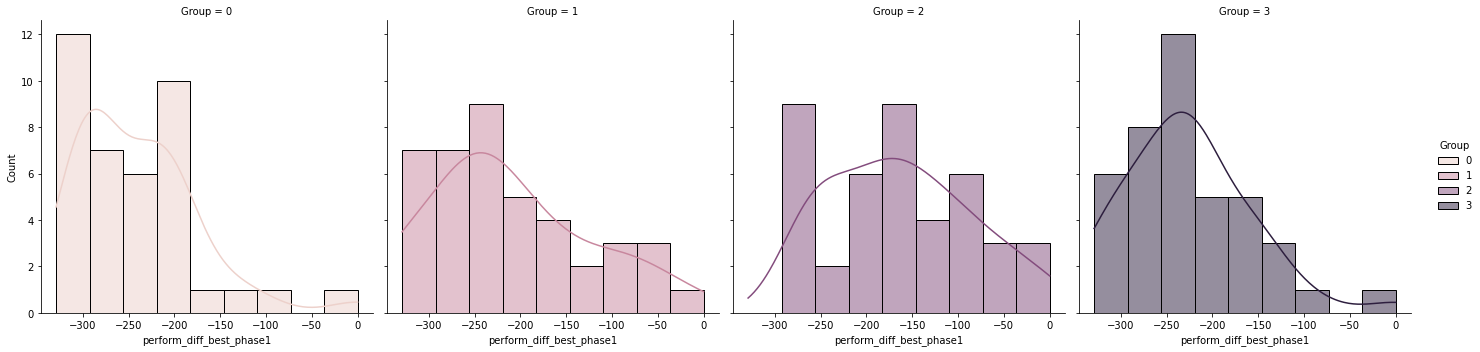

In [6]:
sns.displot(x='perform_diff_best_phase1', data=bogota_final, hue="Group", col="Group", kde=True)

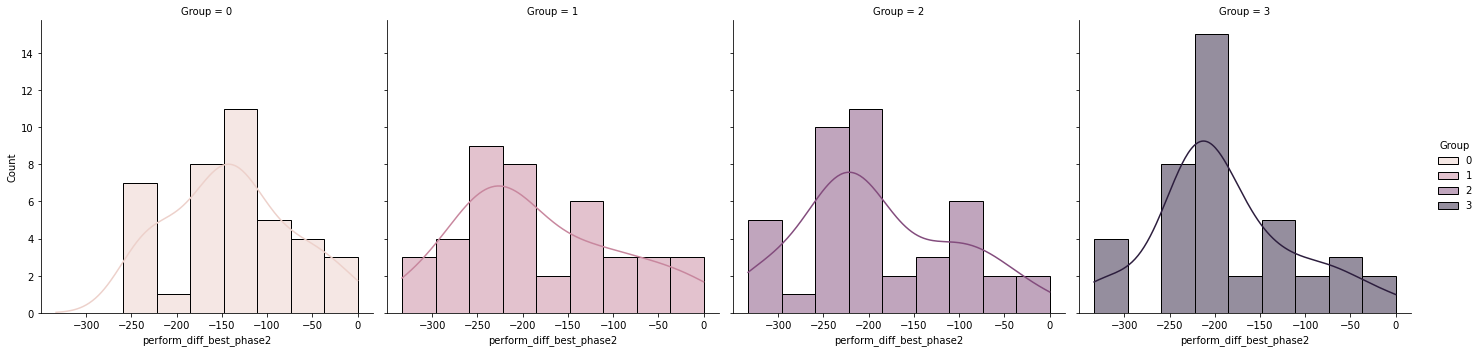

In [7]:
sns.displot(x='perform_diff_best_phase2', data=bogota_final, hue="Group", col="Group", kde=True)

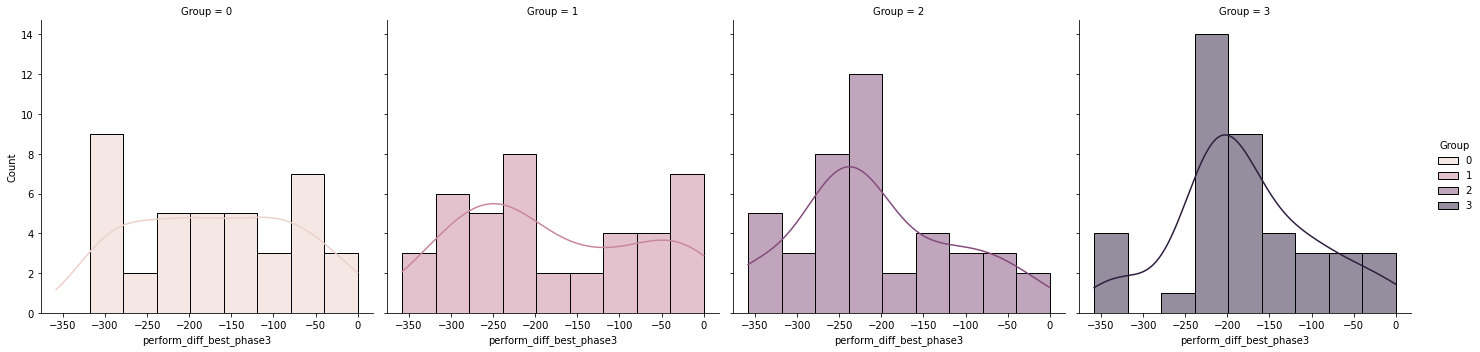

In [8]:
sns.displot(x='perform_diff_best_phase3', data=bogota_final, hue="Group", col="Group", kde=True)

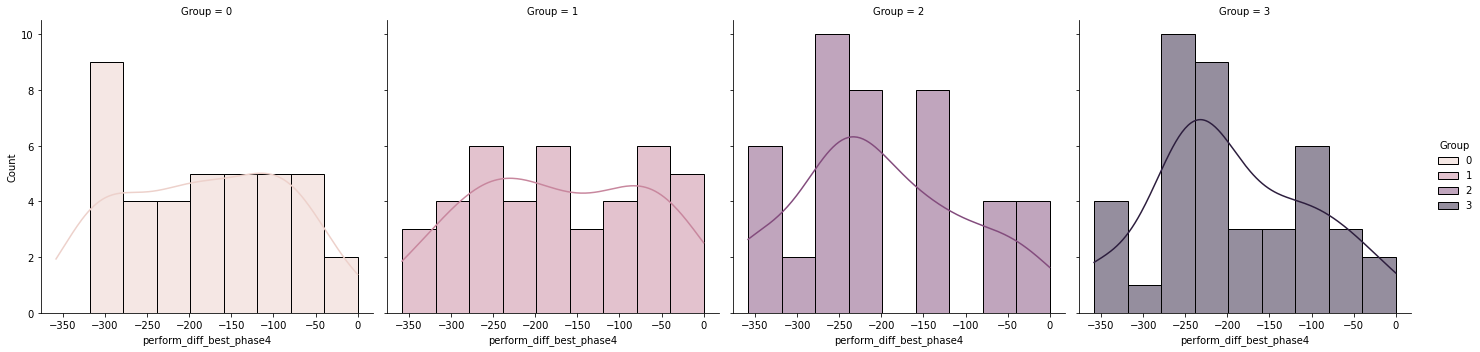

In [9]:
sns.displot(x='perform_diff_best_phase4', data=bogota_final, hue="Group", col="Group", kde=True)

## After Absolute 

In [10]:
bogota_final['abs_perform_diff_best_phase1'] = bogota_final['perform_diff_best_phase1'].abs()
bogota_final['abs_perform_diff_best_phase2'] = bogota_final['perform_diff_best_phase2'].abs()
bogota_final['abs_perform_diff_best_phase3'] = bogota_final['perform_diff_best_phase3'].abs()
bogota_final['abs_perform_diff_best_phase4'] = bogota_final['perform_diff_best_phase4'].abs()
bogota_final['abs_perform_diff_best_phase5'] = bogota_final['perform_diff_best_phase5'].abs()

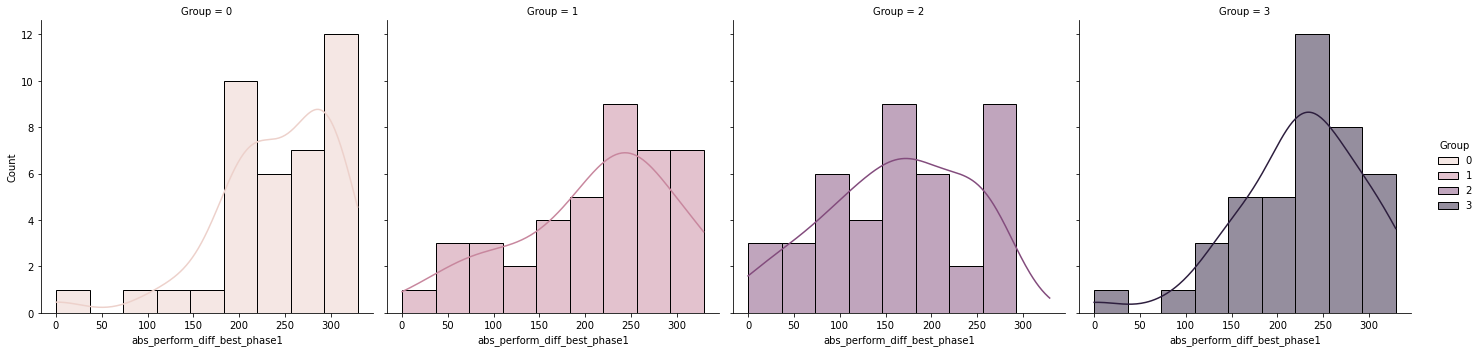

In [11]:
sns.displot(x='abs_perform_diff_best_phase1', data=bogota_final, hue="Group", col="Group", kde=True)

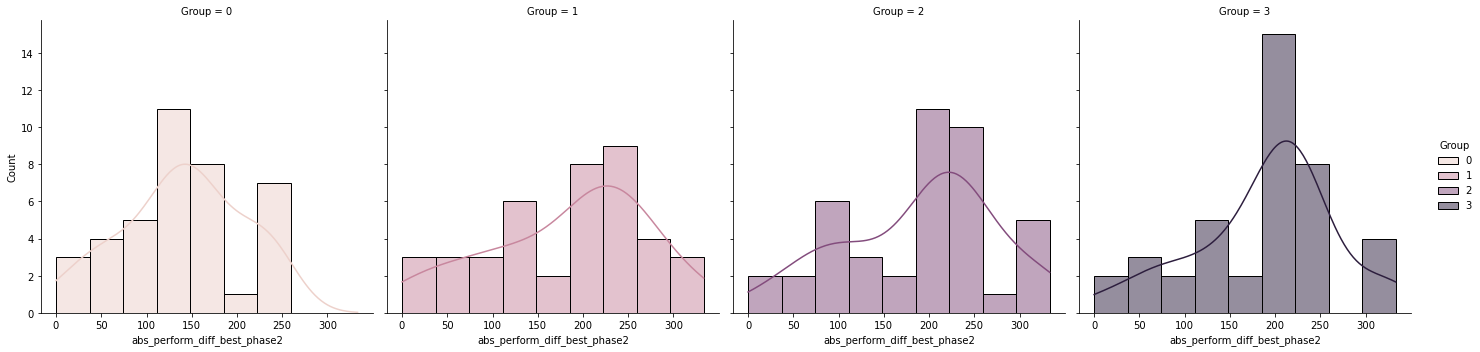

In [12]:
sns.displot(x='abs_perform_diff_best_phase2', data=bogota_final, hue="Group", col="Group", kde=True)

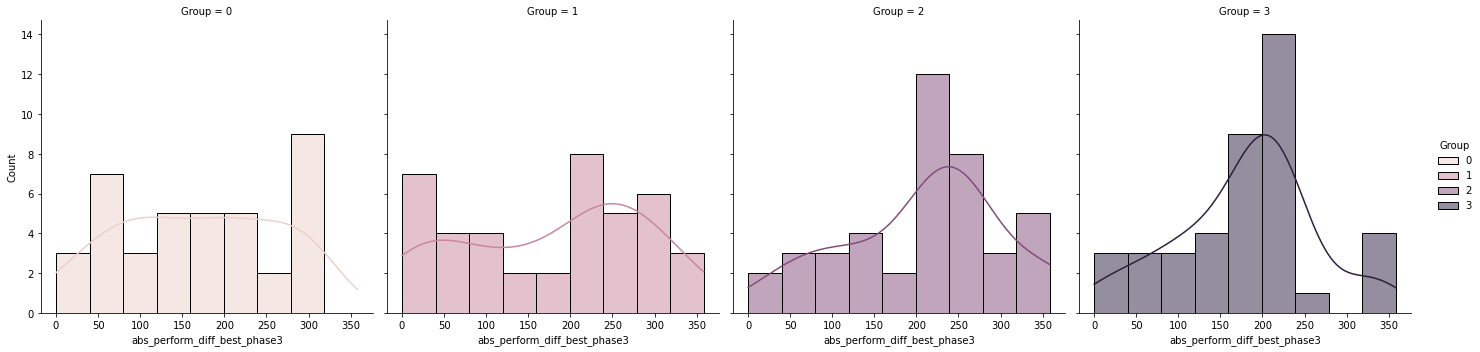

In [13]:
sns.displot(x='abs_perform_diff_best_phase3', data=bogota_final, hue="Group", col="Group", kde=True)

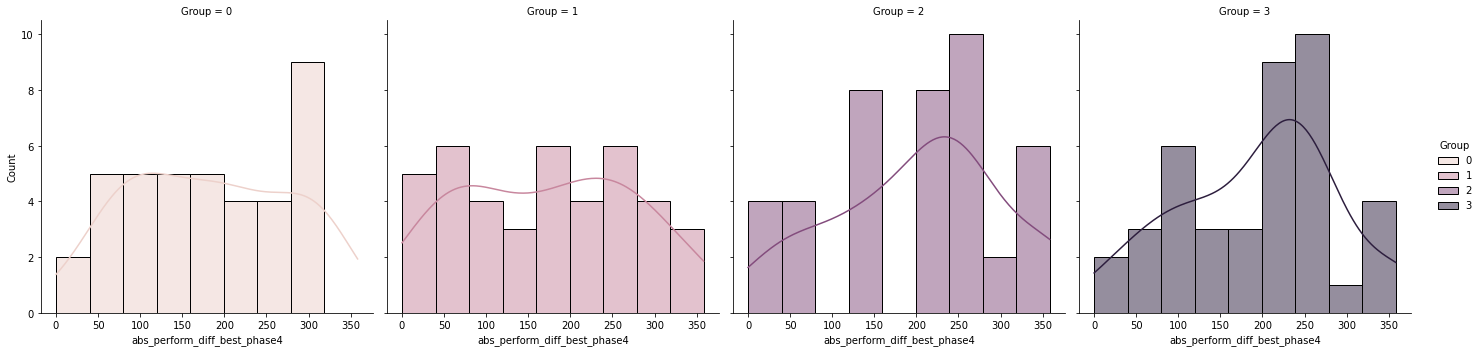

In [14]:
sns.displot(x='abs_perform_diff_best_phase4', data=bogota_final, hue="Group", col="Group", kde=True)

In [15]:
group0 = bogota_final[bogota_final['Group'] == 0]
group1 = bogota_final[bogota_final['Group'] == 1]
group2 = bogota_final[bogota_final['Group'] == 2]
group3 = bogota_final[bogota_final['Group'] == 3]

In [16]:
mean_log_perform_bogota3 = []
mean_log_perform_bogota2 = []
mean_log_perform_bogota1 = []
mean_log_perform_bogota0 = []

median_log_perform_bogota3 = []
median_log_perform_bogota2 = []
median_log_perform_bogota1 = []
median_log_perform_bogota0 = []

min_log_bogota3 = []
min_log_bogota2 = []
min_log_bogota1 = []
min_log_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []


for df in [group0['abs_perform_diff_best_phase1'], group0['abs_perform_diff_best_phase2'], group0['abs_perform_diff_best_phase3'], group0['abs_perform_diff_best_phase4'], group0['abs_perform_diff_best_phase5']]:
    mean_value = df.mean()
    median_value = df.median()
    median_log_perform_bogota3.append(median_value)
    min_value = df.min()
    min_log_bogota3.append(min_value)
    max_value = df.max()
    max_log_bogota3.append(max_value)
    mean_log_perform_bogota3.append(mean_value)

for df in [group1['abs_perform_diff_best_phase1'], group1['abs_perform_diff_best_phase2'], group1['abs_perform_diff_best_phase3'], group1['abs_perform_diff_best_phase4'], group1['abs_perform_diff_best_phase5']]:
    mean_value = df.mean()
    median_value = df.median()
    median_log_perform_bogota2.append(median_value)
    min_value = df.min()
    min_log_bogota2.append(min_value)
    max_value = df.max()
    max_log_bogota2.append(max_value)
    mean_log_perform_bogota2.append(mean_value)
    
for df in [group2['abs_perform_diff_best_phase1'], group2['abs_perform_diff_best_phase2'], group2['abs_perform_diff_best_phase3'], group2['abs_perform_diff_best_phase4'], group2['abs_perform_diff_best_phase5']]:
    mean_value = df.mean()
    median_value = df.median()
    median_log_perform_bogota1.append(median_value)
    min_value = df.min()
    min_log_bogota1.append(min_value)
    max_value = df.max()
    max_log_bogota1.append(max_value)
    mean_log_perform_bogota1.append(mean_value)

for df in [group3['abs_perform_diff_best_phase1'], group3['abs_perform_diff_best_phase2'], group3['abs_perform_diff_best_phase3'], group3['abs_perform_diff_best_phase4'], group3['abs_perform_diff_best_phase5']]:
    mean_value = df.mean()
    median_value = df.median()
    median_log_perform_bogota0.append(median_value)
    min_value = df.min()
    min_log_bogota0.append(min_value)
    max_value = df.max()
    max_log_bogota0.append(max_value)
    mean_log_perform_bogota0.append(mean_value)

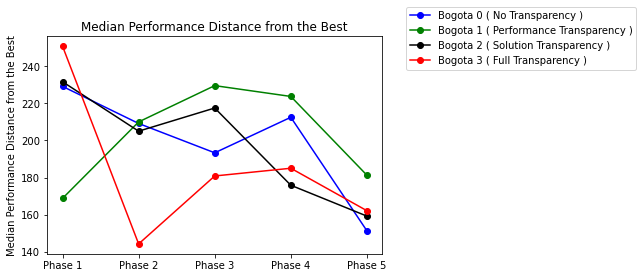

In [17]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_perform_bogota0
y2 = median_log_perform_bogota1
y3 = median_log_perform_bogota2
y4 = median_log_perform_bogota3

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Median Performance Distance from the Best")
plt.ylabel("Median Performance Distance from the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

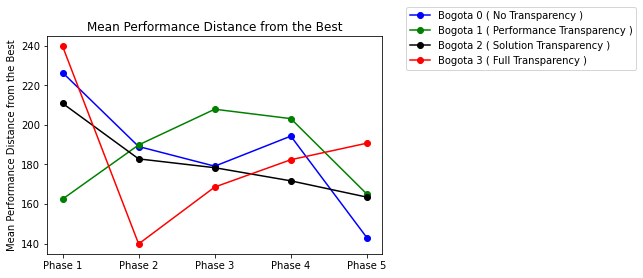

In [18]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_perform_bogota0
y2 = mean_log_perform_bogota1
y3 = mean_log_perform_bogota2
y4 = mean_log_perform_bogota3

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Performance Distance from the Best")
plt.ylabel("Mean Performance Distance from the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Similarity from the Best

In [19]:
bogota3_phase4_high_compare = df1[(df1['user1_phase'] != df1['user2_phase']) & (df1['user1'] != df1['user2']) & (df1['user1'] == bogota3_phase4_high)]
bogota3_phase3_high_compare = df2[(df2['user1_phase'] != df2['user2_phase']) & (df2['user1'] != df2['user2']) & (df2['user1'] == bogota3_phase3_high)]
bogota3_phase2_high_compare = df3[(df3['user1_phase'] != df3['user2_phase']) & (df3['user1'] != df3['user2']) & (df3['user1'] == bogota3_phase2_high)]
bogota3_phase1_high_compare = df4[(df4['user1_phase'] != df4['user2_phase']) & (df4['user1'] != df4['user2']) & (df4['user1'] == bogota3_phase1_high)]


bogota2_phase4_high_compare = df1_bogota2[(df1_bogota2['user1_phase'] != df1_bogota2['user2_phase']) & (df1_bogota2['user1'] != df1_bogota2['user2']) & (df1_bogota2['user1']==bogota2_phase4_high)]
bogota2_phase3_high_compare = df2_bogota2[(df2_bogota2['user1_phase'] != df2_bogota2['user2_phase']) & (df2_bogota2['user1'] != df2_bogota2['user2']) & (df2_bogota2['user1']==bogota2_phase3_high)]
bogota2_phase2_high_compare = df3_bogota2[(df3_bogota2['user1_phase'] != df3_bogota2['user2_phase']) & (df3_bogota2['user1'] != df3_bogota2['user2']) & (df3_bogota2['user1']==bogota2_phase2_high)]
bogota2_phase1_high_compare = df4_bogota2[(df4_bogota2['user1_phase'] != df4_bogota2['user2_phase']) & (df4_bogota2['user1'] != df4_bogota2['user2']) & (df4_bogota2['user1']==bogota2_phase1_high)]


bogota1_phase4_high_compare = df1_bogota1[(df1_bogota1['user1_phase'] != df1_bogota1['user2_phase']) & (df1_bogota1['user1'] != df1_bogota1['user2']) & (df1_bogota1['user1']==bogota1_phase4_high)]
bogota1_phase3_high_compare = df2_bogota1[(df2_bogota1['user1_phase'] != df2_bogota1['user2_phase']) & (df2_bogota1['user1'] != df2_bogota1['user2']) & (df2_bogota1['user1']==bogota1_phase3_high)]
bogota1_phase2_high_compare = df3_bogota1[(df3_bogota1['user1_phase'] != df3_bogota1['user2_phase']) & (df3_bogota1['user1'] != df3_bogota1['user2']) & (df3_bogota1['user1']==bogota1_phase2_high)]
bogota1_phase1_high_compare = df4_bogota1[(df4_bogota1['user1_phase'] != df4_bogota1['user2_phase']) & (df4_bogota1['user1'] != df4_bogota1['user2']) & (df4_bogota1['user1']==bogota1_phase1_high)]


bogota0_phase4_high_compare = df1_bogota0[(df1_bogota0['user1_phase'] != df1_bogota0['user2_phase']) & (df1_bogota0['user1'] != df1_bogota0['user2']) & (df1_bogota0['user1']==bogota0_phase4_high)]
bogota0_phase3_high_compare = df2_bogota0[(df2_bogota0['user1_phase'] != df2_bogota0['user2_phase']) & (df2_bogota0['user1'] != df2_bogota0['user2']) & (df2_bogota0['user1']==bogota0_phase3_high)]
bogota0_phase2_high_compare = df3_bogota0[(df3_bogota0['user1_phase'] != df3_bogota0['user2_phase']) & (df3_bogota0['user1'] != df3_bogota0['user2']) & (df3_bogota0['user1']==bogota0_phase2_high)]
bogota0_phase1_high_compare = df4_bogota0[(df4_bogota0['user1_phase'] != df4_bogota0['user2_phase']) & (df4_bogota0['user1'] != df4_bogota0['user2']) & (df4_bogota0['user1']==bogota0_phase1_high)]



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

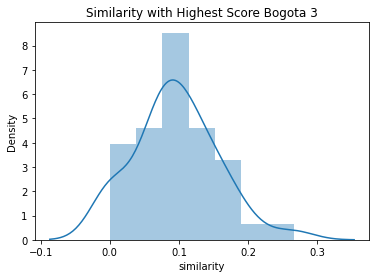

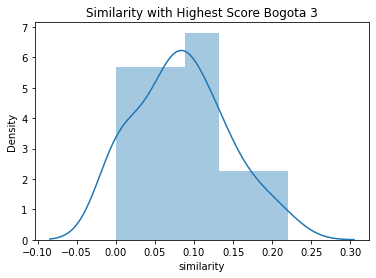

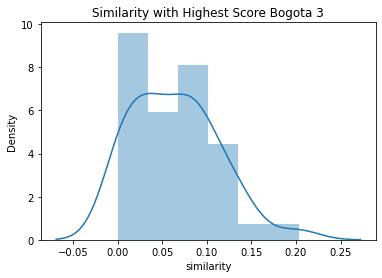

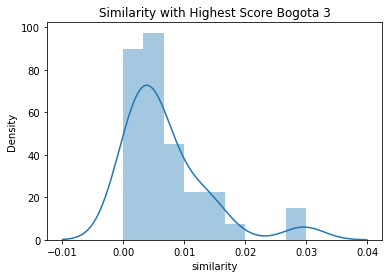

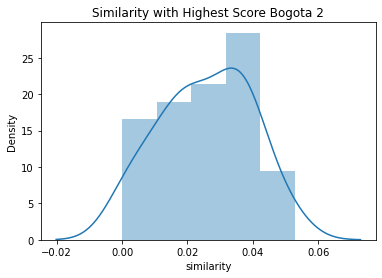

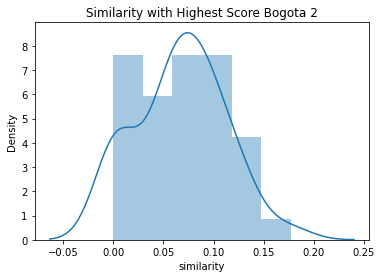

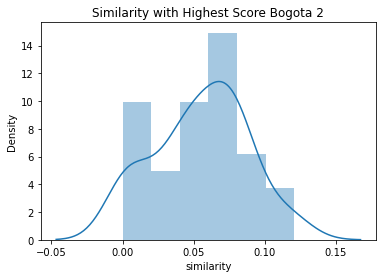

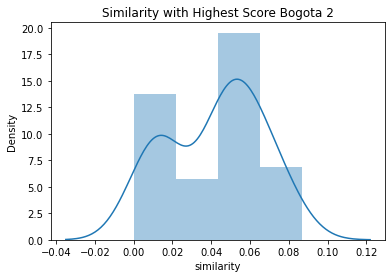

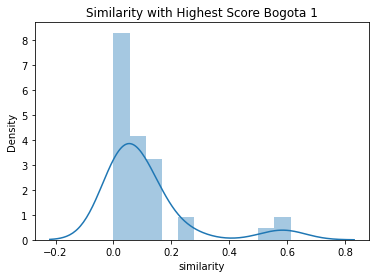

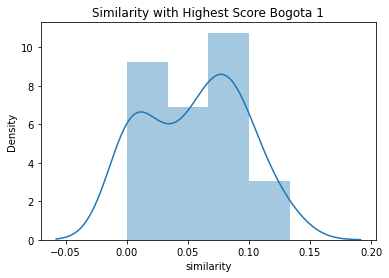

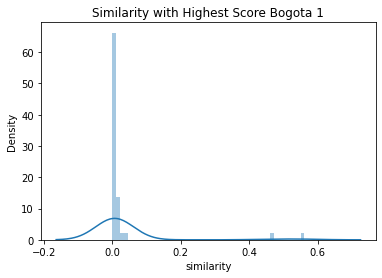

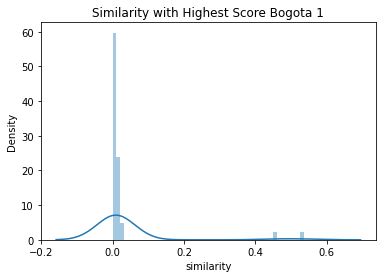

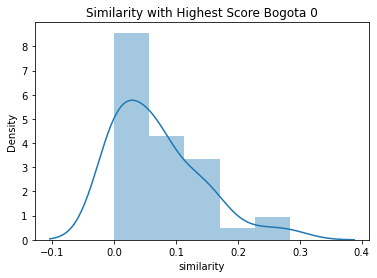

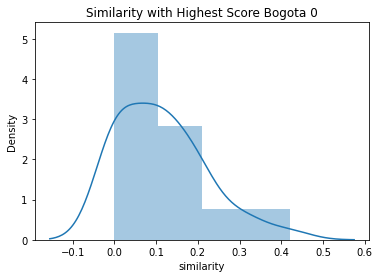

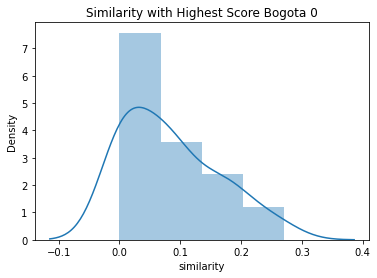

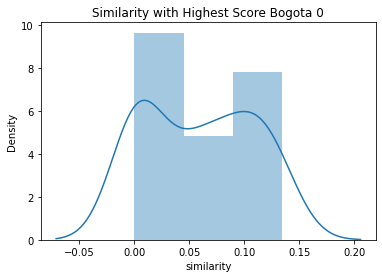

In [20]:
median_log_best_bogota3 = []
median_log_best_bogota2 = []
median_log_best_bogota1 = []
median_log_best_bogota0 = []

mean_log_best_bogota3 = []
mean_log_best_bogota2 = []
mean_log_best_bogota1 = []
mean_log_best_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []


for df in [bogota3_phase1_high_compare, bogota3_phase2_high_compare, bogota3_phase3_high_compare, bogota3_phase4_high_compare]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_best_bogota3.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_best_bogota3.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota3.append(max_value)
    plt.figure()
    plt.title("Similarity with Highest Score Bogota 3")
    sns.distplot(np.log(df['similarity']+1))

for df in [bogota2_phase1_high_compare, bogota2_phase2_high_compare, bogota2_phase3_high_compare, bogota2_phase4_high_compare]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_best_bogota2.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_best_bogota2.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota2.append(max_value)
    plt.figure()
    plt.title("Similarity with Highest Score Bogota 2")
    sns.distplot(np.log(df['similarity']+1))
    
for df in [bogota1_phase1_high_compare, bogota1_phase2_high_compare, bogota1_phase3_high_compare, bogota1_phase4_high_compare]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_best_bogota1.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_best_bogota1.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota1.append(max_value)
    plt.figure()
    plt.title("Similarity with Highest Score Bogota 1")
    sns.distplot(np.log(df['similarity']+1))

for df in [bogota0_phase1_high_compare, bogota0_phase2_high_compare, bogota0_phase3_high_compare, bogota0_phase4_high_compare]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_best_bogota0.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_best_bogota0.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota0.append(max_value)
    plt.figure()
    plt.title("Similarity with Highest Score Bogota 0")
    sns.distplot(np.log(df['similarity']+1))
    

>> No transparency is normal, but also a bit right skewed / positively skewed. Bogota 1 is normal, but right skewed in stage 2 and stage 3.
Bogota 2 and bogota 3 have normal distributions throughout the phases. 

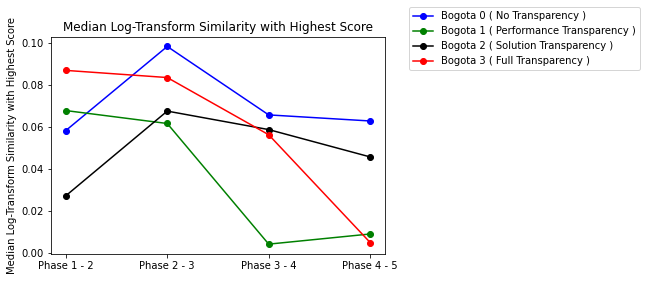

In [21]:
import matplotlib.pyplot as plt

y1 = median_log_best_bogota0
y2 = median_log_best_bogota1
y3 = median_log_best_bogota2
y4 = median_log_best_bogota3

x_axis=['Phase 1 - 2', 'Phase 2 - 3', 'Phase 3 - 4', 'Phase 4 - 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Median Log-Transform Similarity with Highest Score")
plt.ylabel("Median Log-Transform Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

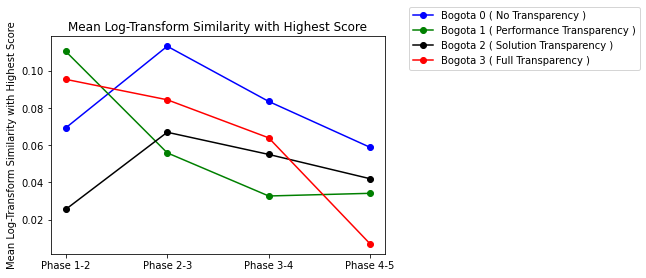

In [22]:
import matplotlib.pyplot as plt

y1 = mean_log_best_bogota0
y2 = mean_log_best_bogota1
y3 = mean_log_best_bogota2
y4 = mean_log_best_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Log-Transform Similarity with Highest Score")
plt.ylabel("Mean Log-Transform Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

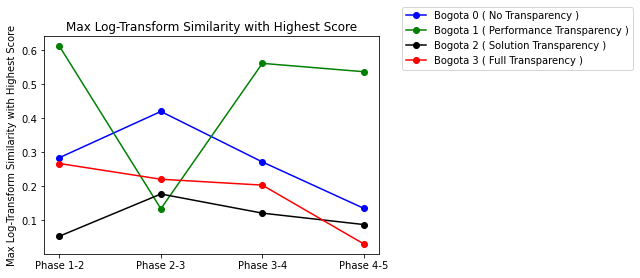

In [23]:
import matplotlib.pyplot as plt

y1 = max_log_bogota0
y2 = max_log_bogota1
y3 = max_log_bogota2
y4 = max_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Max Log-Transform Similarity with Highest Score")
plt.ylabel("Max Log-Transform Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## T-test on Performance Distance

In [24]:
from itertools import combinations
from scipy import stats as st

df = bogota_final[['Group','abs_perform_diff_best_phase1','abs_perform_diff_best_phase2', 'abs_perform_diff_best_phase3' , 'abs_perform_diff_best_phase4', 'abs_perform_diff_best_phase5']]

def all_pairwise(df, compare_col = 'Group'):
    decade_pairs = [(i,j) for i, j in combinations(df[compare_col].unique().tolist(), 2)]
    # or add a list of colnames to function signature
    cols = list(df.columns)
    cols.remove(compare_col)
    list_of_dfs = []
    for pair in decade_pairs:
        for col in cols:
            c1 = df[df[compare_col] == pair[0]][col]
            c2 = df[df[compare_col] == pair[1]][col]
            results = st.ttest_ind(c1, c2, nan_policy='omit')
            tmp = pd.DataFrame({'group1': pair[0],
                                'group2': pair[1],
                                'tstat': results.statistic,
                                'pvalue': results.pvalue}, index = [col])
            list_of_dfs.append(tmp)
    df_stats = pd.concat(list_of_dfs)
    return df_stats

df_stats = all_pairwise(df)
df_stats

,group1,group2,tstat,pvalue
abs_perform_diff_best_phase1,0,1,1.661373,0.100653
abs_perform_diff_best_phase2,0,1,-2.430520,0.017373
abs_perform_diff_best_phase3,0,1,-0.426686,0.670784
abs_perform_diff_best_phase4,0,1,0.478841,0.633391
abs_perform_diff_best_phase5,0,1,1.108754,0.270943
abs_perform_diff_best_phase1,0,2,4.842724,0.000006
abs_perform_diff_best_phase2,0,2,-2.941031,0.004290
abs_perform_diff_best_phase3,0,2,-1.867402,0.065554
abs_perform_diff_best_phase4,0,2,-0.950317,0.344850
abs_perform_diff_best_phase5,0,2,1.061807,0.291558


## T-test on similarity with highest score

In [25]:
# T-tests between Bogota 1 and Bogota 3

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [bogota3_phase1_high_compare, bogota3_phase2_high_compare, bogota3_phase3_high_compare, bogota3_phase4_high_compare], [bogota1_phase1_high_compare, bogota1_phase2_high_compare, bogota1_phase3_high_compare, bogota1_phase4_high_compare] 
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(list1[x]['similarity']+1), np.log(list2[y]['similarity']+1))
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

,group1,group2,statistics,pvalue


In [26]:
# T-tests between Bogota 2 and Bogota 3

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [bogota2_phase1_high_compare, bogota2_phase2_high_compare, bogota2_phase3_high_compare, bogota2_phase4_high_compare], [bogota1_phase1_high_compare, bogota1_phase2_high_compare, bogota1_phase3_high_compare, bogota1_phase4_high_compare] 
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(list1[x]['similarity']+1), np.log(list2[y]['similarity']+1))
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

,group1,group2,statistics,pvalue


In [27]:
# T-tests between Bogota 0 and Bogota 3

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [bogota0_phase1_high_compare, bogota0_phase2_high_compare, bogota0_phase3_high_compare, bogota0_phase4_high_compare], [bogota3_phase1_high_compare, bogota3_phase2_high_compare, bogota3_phase3_high_compare, bogota3_phase4_high_compare] 
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(list1[x]['similarity']+1), np.log(list2[y]['similarity']+1))
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

,group1,group2,statistics,pvalue


In [28]:
# store variables to be retrieved in correlation charts 

%store group0
%store group1
%store group2
%store group3

# store variables to be used in template similarity with best person
%store bogota_final

Stored 'group0' (DataFrame)
Stored 'group1' (DataFrame)
Stored 'group2' (DataFrame)
Stored 'group3' (DataFrame)
Stored 'bogota_final' (DataFrame)


## Similarity of Best Person in each Group with Template

In [29]:
bogota3_phase1_high_template = phase1_group3[phase1_group3['user1']==bogota3_phase1_high]
bogota3_phase2_high_template = phase2_group3[phase2_group3['user1']==bogota3_phase2_high]
bogota3_phase3_high_template = phase3_group3[phase3_group3['user1']==bogota3_phase3_high]
bogota3_phase4_high_template = phase4_group3[phase4_group3['user1']==bogota3_phase4_high]
bogota3_phase5_high_template = phase5_group3[phase5_group3['user1']==bogota3_phase5_high]

bogota2_phase1_high_template = phase1_group2[phase1_group2['user1']==bogota2_phase1_high]
bogota2_phase2_high_template = phase2_group2[phase2_group2['user1']==bogota2_phase2_high]
bogota2_phase3_high_template = phase3_group2[phase3_group2['user1']==bogota2_phase3_high]
bogota2_phase4_high_template = phase4_group2[phase4_group2['user1']==bogota2_phase4_high]
bogota2_phase5_high_template = phase5_group2[phase5_group2['user1']==bogota2_phase5_high]

bogota1_phase1_high_template = phase1_group1[phase1_group1['user1']==bogota1_phase1_high]
bogota1_phase2_high_template = phase2_group1[phase2_group1['user1']==bogota1_phase2_high]
bogota1_phase3_high_template = phase3_group1[phase3_group1['user1']==bogota1_phase3_high]
bogota1_phase4_high_template = phase4_group1[phase4_group1['user1']==bogota1_phase4_high]
bogota1_phase5_high_template = phase5_group1[phase5_group1['user1']==bogota1_phase5_high]

bogota0_phase1_high_template = phase1_group0[phase1_group0['user1']==bogota0_phase1_high]
bogota0_phase2_high_template = phase2_group0[phase2_group0['user1']==bogota0_phase2_high]
bogota0_phase3_high_template = phase3_group0[phase3_group0['user1']==bogota0_phase3_high]
bogota0_phase4_high_template = phase4_group0[phase4_group0['user1']==bogota0_phase4_high]
bogota0_phase5_high_template = phase5_group0[phase5_group0['user1']==bogota0_phase5_high]

In [30]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []


for df in [bogota3_phase1_high_template, bogota3_phase2_high_template, bogota3_phase3_high_template, bogota3_phase4_high_template, bogota3_phase5_high_template ]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_bogota3.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_bogota3.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota3.append(max_value)
    

for df in [bogota2_phase1_high_template, bogota2_phase2_high_template, bogota2_phase3_high_template, bogota2_phase4_high_template, bogota2_phase5_high_template ]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_bogota2.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_bogota2.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota2.append(max_value)

    
for df in [bogota1_phase1_high_template, bogota1_phase2_high_template, bogota1_phase3_high_template, bogota1_phase4_high_template, bogota1_phase5_high_template ]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_bogota1.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_bogota1.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota1.append(max_value)


for df in [bogota0_phase1_high_template, bogota0_phase2_high_template, bogota0_phase3_high_template, bogota0_phase4_high_template, bogota0_phase5_high_template ]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_bogota0.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_bogota0.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota0.append(max_value)
    
    

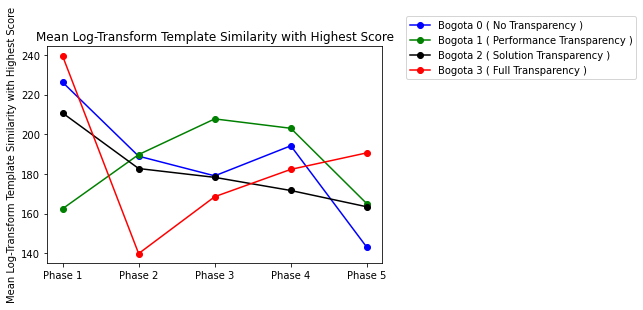

In [31]:
import matplotlib.pyplot as plt

y1 = mean_log_perform_bogota0
y2 = mean_log_perform_bogota1
y3 = mean_log_perform_bogota2
y4 = mean_log_perform_bogota3

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Log-Transform Template Similarity with Highest Score")
plt.ylabel("Mean Log-Transform Template Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

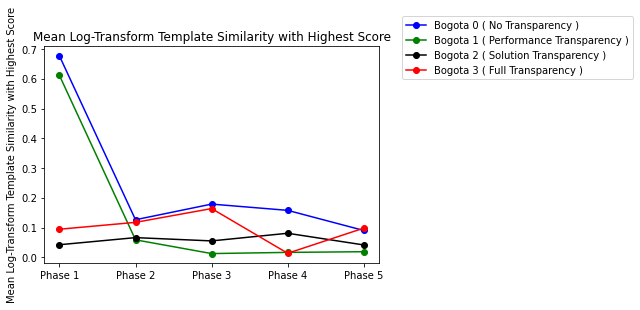

In [32]:
import matplotlib.pyplot as plt

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Log-Transform Template Similarity with Highest Score")
plt.ylabel("Mean Log-Transform Template Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)



## x-axis is the median/mean similarity from the best and y-axis is the median/mean similarity with template

In [33]:
mean_log_best_bogota0

[0.0693831002188116,
 0.11328043795872923,
 0.08359081341925098,
 0.05888288190675128]

In [34]:
mean_log_template_bogota0

[0.08172810400937065,
 0.12311902049544846,
 0.11802358484733003,
 0.11160260393994273,
 0.10984176573284918]

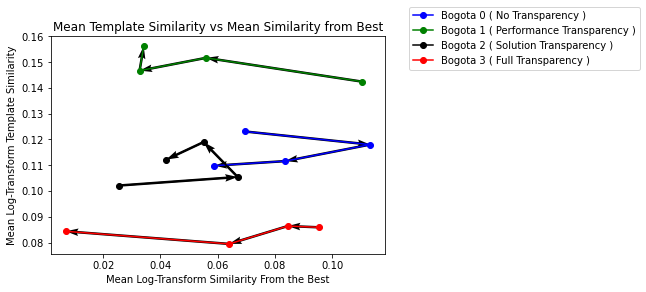

In [35]:
import matplotlib.pyplot as plt

x1 = mean_log_best_bogota0
x2 = mean_log_best_bogota1
x3 = mean_log_best_bogota2
x4 = mean_log_best_bogota3

del mean_log_template_bogota0[0]
del mean_log_template_bogota1[0]
del mean_log_template_bogota2[0]
del mean_log_template_bogota3[0]

y1 = mean_log_template_bogota0
y2 = mean_log_template_bogota1
y3 = mean_log_template_bogota2
y4 = mean_log_template_bogota3

deltaX1, deltaX2, deltaX3, deltaX4 = [np.diff(x) for x in [x1, x2, x3, x4]]
deltaY1, deltaY2, deltaY3, deltaY4 = [np.diff(y) for y in [y1, y2, y3, y4]]

line1 = plt.plot(x1, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x2, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x3, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x4, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

arrows1 = plt.quiver(x1[:-1], y1[:-1], deltaX1, deltaY1, scale_units='xy', angles='xy', scale=1)
arrows2 = plt.quiver(x2[:-1], y2[:-1], deltaX2, deltaY2, scale_units='xy', angles='xy', scale=1)
arrows3 = plt.quiver(x3[:-1], y3[:-1], deltaX3, deltaY3, scale_units='xy', angles='xy', scale=1)
arrows4 = plt.quiver(x4[:-1], y4[:-1], deltaX4, deltaY4, scale_units='xy', angles='xy', scale=1)

plt.title("Mean Template Similarity vs Mean Similarity from Best")
plt.ylabel("Mean Log-Transform Template Similarity")
plt.xlabel("Mean Log-Transform Similarity From the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)


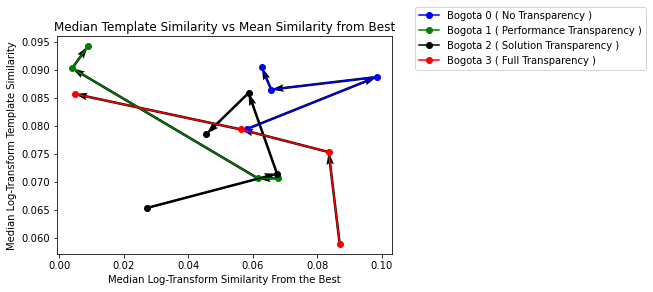

In [36]:
import matplotlib.pyplot as plt

x1 = median_log_best_bogota0
x2 = median_log_best_bogota1
x3 = median_log_best_bogota2
x4 = median_log_best_bogota3

del median_log_template_bogota0[0]
del median_log_template_bogota1[0]
del median_log_template_bogota2[0]
del median_log_template_bogota3[0]

y1 = median_log_template_bogota0
y2 = median_log_template_bogota1
y3 = median_log_template_bogota2
y4 = median_log_template_bogota3

deltaX1, deltaX2, deltaX3, deltaX4 = [np.diff(x) for x in [x1, x2, x3, x4]]
deltaY1, deltaY2, deltaY3, deltaY4 = [np.diff(y) for y in [y1, y2, y3, y4]]


line1 = plt.plot(x1, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x2, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x3, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x4, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

arrows1 = plt.quiver(x1[:-1], y1[:-1], deltaX1, deltaY1, scale_units='xy', angles='xy', scale=1)
arrows2 = plt.quiver(x2[:-1], y2[:-1], deltaX2, deltaY2, scale_units='xy', angles='xy', scale=1)
arrows3 = plt.quiver(x3[:-1], y3[:-1], deltaX3, deltaY3, scale_units='xy', angles='xy', scale=1)
arrows4 = plt.quiver(x4[:-1], y4[:-1], deltaX4, deltaY4, scale_units='xy', angles='xy', scale=1)

plt.title("Median Template Similarity vs Mean Similarity from Best")
plt.ylabel("Median Log-Transform Template Similarity")
plt.xlabel("Median Log-Transform Similarity From the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)


## x-axis is the median/mean similarity from the best and y-axis is the performance distance from best

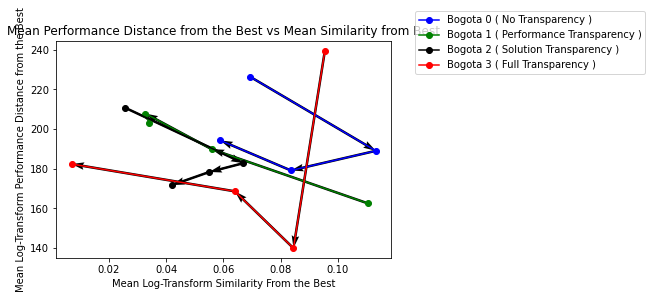

In [37]:
import matplotlib.pyplot as plt

x1 = mean_log_best_bogota0
x2 = mean_log_best_bogota1
x3 = mean_log_best_bogota2
x4 = mean_log_best_bogota3

del mean_log_perform_bogota0[-1]
del mean_log_perform_bogota1[-1]
del mean_log_perform_bogota2[-1]
del mean_log_perform_bogota3[-1]

y1 = mean_log_perform_bogota0
y2 = mean_log_perform_bogota1
y3 = mean_log_perform_bogota2
y4 = mean_log_perform_bogota3

deltaX1, deltaX2, deltaX3, deltaX4 = [np.diff(x) for x in [x1, x2, x3, x4]]
deltaY1, deltaY2, deltaY3, deltaY4 = [np.diff(y) for y in [y1, y2, y3, y4]]

line1 = plt.plot(x1, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x2, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x3, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x4, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

arrows1 = plt.quiver(x1[:-1], y1[:-1], deltaX1, deltaY1, scale_units='xy', angles='xy', scale=1)
arrows2 = plt.quiver(x2[:-1], y2[:-1], deltaX2, deltaY2, scale_units='xy', angles='xy', scale=1)
arrows3 = plt.quiver(x3[:-1], y3[:-1], deltaX3, deltaY3, scale_units='xy', angles='xy', scale=1)
arrows4 = plt.quiver(x4[:-1], y4[:-1], deltaX4, deltaY4, scale_units='xy', angles='xy', scale=1)

plt.title("Mean Performance Distance from the Best vs Mean Similarity from Best")
plt.ylabel("Mean Log-Transform Performance Distance from the Best")
plt.xlabel("Mean Log-Transform Similarity From the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)




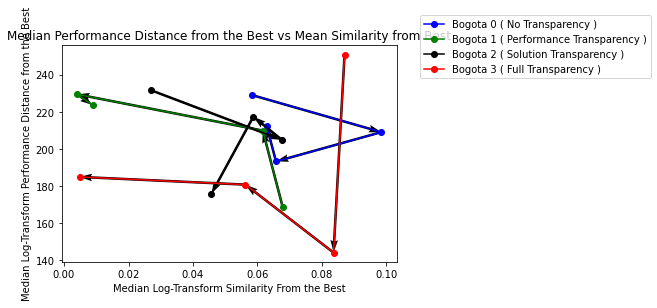

In [38]:
import matplotlib.pyplot as plt

x1 = median_log_best_bogota0
x2 = median_log_best_bogota1
x3 = median_log_best_bogota2
x4 = median_log_best_bogota3

del median_log_perform_bogota0[-1]
del median_log_perform_bogota1[-1]
del median_log_perform_bogota2[-1]
del median_log_perform_bogota3[-1]

y1 = median_log_perform_bogota0
y2 = median_log_perform_bogota1
y3 = median_log_perform_bogota2
y4 = median_log_perform_bogota3

deltaX1, deltaX2, deltaX3, deltaX4 = [np.diff(x) for x in [x1, x2, x3, x4]]
deltaY1, deltaY2, deltaY3, deltaY4 = [np.diff(y) for y in [y1, y2, y3, y4]]

line1 = plt.plot(x1, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x2, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x3, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x4, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

arrows1 = plt.quiver(x1[:-1], y1[:-1], deltaX1, deltaY1, scale_units='xy', angles='xy', scale=1)
arrows2 = plt.quiver(x2[:-1], y2[:-1], deltaX2, deltaY2, scale_units='xy', angles='xy', scale=1)
arrows3 = plt.quiver(x3[:-1], y3[:-1], deltaX3, deltaY3, scale_units='xy', angles='xy', scale=1)
arrows4 = plt.quiver(x4[:-1], y4[:-1], deltaX4, deltaY4, scale_units='xy', angles='xy', scale=1)

plt.title("Median Performance Distance from the Best vs Mean Similarity from Best")
plt.ylabel("Median Log-Transform Performance Distance from the Best")
plt.xlabel("Median Log-Transform Similarity From the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [39]:
%store bogota_final

Stored 'bogota_final' (DataFrame)


In [40]:
%store bogota0_phase4_high_compare
%store bogota0_phase3_high_compare
%store bogota0_phase2_high_compare
%store bogota0_phase1_high_compare

%store bogota1_phase4_high_compare
%store bogota1_phase3_high_compare
%store bogota1_phase2_high_compare
%store bogota1_phase1_high_compare

%store bogota2_phase4_high_compare
%store bogota2_phase3_high_compare
%store bogota2_phase2_high_compare
%store bogota2_phase1_high_compare

%store bogota3_phase4_high_compare
%store bogota3_phase3_high_compare
%store bogota3_phase2_high_compare
%store bogota3_phase1_high_compare

Stored 'bogota0_phase4_high_compare' (DataFrame)
Stored 'bogota0_phase3_high_compare' (DataFrame)
Stored 'bogota0_phase2_high_compare' (DataFrame)
Stored 'bogota0_phase1_high_compare' (DataFrame)
Stored 'bogota1_phase4_high_compare' (DataFrame)
Stored 'bogota1_phase3_high_compare' (DataFrame)
Stored 'bogota1_phase2_high_compare' (DataFrame)
Stored 'bogota1_phase1_high_compare' (DataFrame)
Stored 'bogota2_phase4_high_compare' (DataFrame)
Stored 'bogota2_phase3_high_compare' (DataFrame)
Stored 'bogota2_phase2_high_compare' (DataFrame)
Stored 'bogota2_phase1_high_compare' (DataFrame)
Stored 'bogota3_phase4_high_compare' (DataFrame)
Stored 'bogota3_phase3_high_compare' (DataFrame)
Stored 'bogota3_phase2_high_compare' (DataFrame)
Stored 'bogota3_phase1_high_compare' (DataFrame)


In [41]:
group3_phase4 = group3[['Student', 'abs_perform_diff_best_phase4']]

In [42]:
end = pd.merge(bogota3_phase4_high_compare, group3_phase4[['Student', 'abs_perform_diff_best_phase4']], how='left', left_on=['user2'], right_on =['Student'])
end

,user1,user2,user1_phase,user2_phase,similarity,Student,abs_perform_diff_best_phase4
0,juligarji,lemartinp,4,5,0.005437,lemartinp,57.50
1,juligarji,nfmorenog,4,5,0.006931,nfmorenog,237.50
2,juligarji,AFelipeGA,4,5,0.001561,AFelipeGA,205.83
3,juligarji,mballeng91,4,5,0.005132,mballeng91,245.83
4,juligarji,dduartec,4,5,0.030488,dduartec,270.83
5,juligarji,srmedinac,4,5,0.005760,srmedinac,242.50
6,juligarji,wilson911013,4,5,0.000390,wilson911013,275.83
7,juligarji,wapiravaguens,4,5,0.001170,wapiravaguens,140.83
8,juligarji,davidh17,4,5,0.007602,davidh17,283.33
9,juligarji,DianaNavarrete,4,5,0.001559,DianaNavarrete,242.50


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Stage 4 Full Transparency')

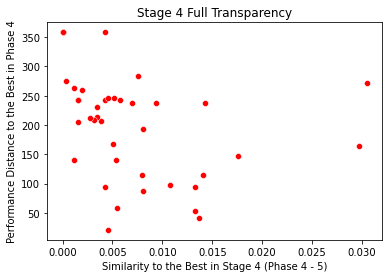

In [43]:
import seaborn as sns

sns.scatterplot(end['similarity'], end['abs_perform_diff_best_phase4'], facecolors = 'red', edgecolors = 'red')
plt.xlabel("Similarity to the Best in Stage 4 (Phase 4 - 5)")
plt.ylabel("Performance Distance to the Best in Phase 4")
plt.title("Stage 4 Full Transparency")

In [44]:
group3_phase3 = group3[['Student', 'abs_perform_diff_best_phase3']]

In [45]:
end = pd.merge(bogota3_phase3_high_compare, group3_phase3[['Student', 'abs_perform_diff_best_phase3']], how='left', left_on=['user2'], right_on =['Student'])
end

,user1,user2,user1_phase,user2_phase,similarity,Student,abs_perform_diff_best_phase3
0,jumcorredorro,lemartinp,3,4,0.100000,lemartinp,193.33
1,jumcorredorro,juligarji,3,4,0.009495,juligarji,126.67
2,jumcorredorro,nfmorenog,3,4,0.139535,nfmorenog,196.67
3,jumcorredorro,AFelipeGA,3,4,0.042105,AFelipeGA,177.50
4,jumcorredorro,mballeng91,3,4,0.007353,mballeng91,230.00
5,jumcorredorro,dduartec,3,4,0.092896,dduartec,25.00
6,jumcorredorro,srmedinac,3,4,0.055944,srmedinac,214.17
7,jumcorredorro,wilson911013,3,4,0.010309,wilson911013,239.17
8,jumcorredorro,wapiravaguens,3,4,0.031250,wapiravaguens,137.50
9,jumcorredorro,davidh17,3,4,0.164557,davidh17,109.17


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Stage 3 Full Transparency')

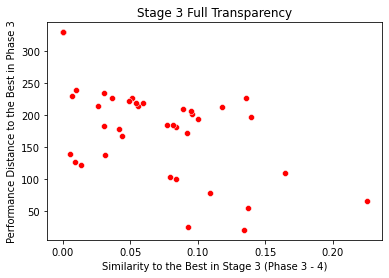

In [46]:
import seaborn as sns

sns.scatterplot(end['similarity'], end['abs_perform_diff_best_phase3'], facecolors = 'red', edgecolors = 'red')
plt.xlabel("Similarity to the Best in Stage 3 (Phase 3 - 4)")
plt.ylabel("Performance Distance to the Best in Phase 3")
plt.title("Stage 3 Full Transparency")

In [47]:
group3_phase2 = group3[['Student', 'abs_perform_diff_best_phase2']]

In [48]:
end = pd.merge(bogota3_phase2_high_compare, group3_phase2[['Student', 'abs_perform_diff_best_phase2']], how='left', left_on=['user2'], right_on =['Student'])
end

,user1,user2,user1_phase,user2_phase,similarity,Student,abs_perform_diff_best_phase2
0,dduartec,lemartinp,2,3,0.125000,lemartinp,201.66
1,dduartec,juligarji,2,3,0.002768,juligarji,91.25
2,dduartec,nfmorenog,2,3,0.246575,nfmorenog,200.00
3,dduartec,AFelipeGA,2,3,0.075000,AFelipeGA,180.83
4,dduartec,mballeng91,2,3,0.004695,mballeng91,233.33
5,dduartec,srmedinac,2,3,0.043478,srmedinac,217.50
6,dduartec,wilson911013,2,3,0.000000,wilson911013,242.50
7,dduartec,wapiravaguens,2,3,0.075000,wapiravaguens,140.83
8,dduartec,davidh17,2,3,0.147727,davidh17,87.50
9,dduartec,DianaNavarrete,2,3,0.069767,DianaNavarrete,205.00


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Stage 2 Full Transparency')

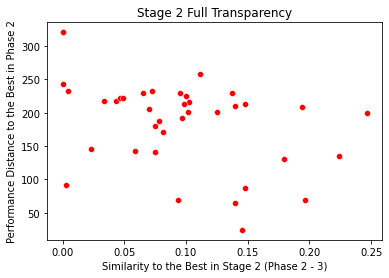

In [49]:
import seaborn as sns

sns.scatterplot(end['similarity'], end['abs_perform_diff_best_phase2'], facecolors = 'red', edgecolors = 'red')
plt.xlabel("Similarity to the Best in Stage 2 (Phase 2 - 3)")
plt.ylabel("Performance Distance to the Best in Phase 2")
plt.title("Stage 2 Full Transparency")

In [50]:
group3_phase1 = group3[['Student', 'abs_perform_diff_best_phase1']]

In [51]:
end = pd.merge(bogota3_phase1_high_compare, group3_phase1[['Student', 'abs_perform_diff_best_phase1']], how='left', left_on=['user2'], right_on =['Student'])
end

,user1,user2,user1_phase,user2_phase,similarity,Student,abs_perform_diff_best_phase1
0,jmalvarezd,lemartinp,1,2,0.146341,lemartinp,270.84
1,jmalvarezd,juligarji,1,2,0.057325,juligarji,167.50
2,jmalvarezd,nfmorenog,1,2,0.190476,nfmorenog,225.00
3,jmalvarezd,AFelipeGA,1,2,0.090909,AFelipeGA,291.67
4,jmalvarezd,mballeng91,1,2,0.004854,mballeng91,329.17
5,jmalvarezd,dduartec,1,2,0.092308,dduartec,287.50
6,jmalvarezd,srmedinac,1,2,0.059524,srmedinac,304.17
7,jmalvarezd,wilson911013,1,2,0.000000,wilson911013,250.84
8,jmalvarezd,wapiravaguens,1,2,0.090909,wapiravaguens,90.00
9,jmalvarezd,davidh17,1,2,0.119403,davidh17,173.34


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Stage 1 Full Transparency')

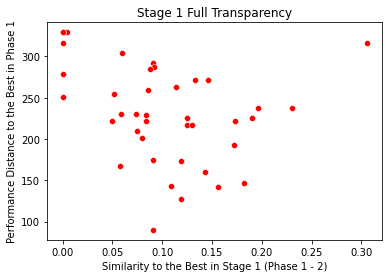

In [52]:
#fig,ax = plt.subplots()

#ax.scatter(end['similarity'], end['abs_perform_diff_best_phase1'])

import seaborn as sns

sns.scatterplot(end['similarity'], end['abs_perform_diff_best_phase1'], facecolors = 'red', edgecolors = 'red')
plt.xlabel("Similarity to the Best in Stage 1 (Phase 1 - 2)")
plt.ylabel("Performance Distance to the Best in Phase 1")
plt.title("Stage 1 Full Transparency")

In [53]:
group2_phase4 = group2[['Student', 'abs_perform_diff_best_phase4']]

In [54]:
end = pd.merge(bogota2_phase4_high_compare, group2_phase4[['Student', 'abs_perform_diff_best_phase4']], how='left', left_on=['user2'], right_on =['Student'])
end

,user1,user2,user1_phase,user2_phase,similarity,Student,abs_perform_diff_best_phase4
0,fabianr23,jusherrerama,4,5,0.045455,jusherrerama,250.83
1,fabianr23,bdvegat,4,5,0.015866,bdvegat,263.33
2,fabianr23,Phoenixest,4,5,0.016043,Phoenixest,263.33
3,fabianr23,HashNick,4,5,0.062130,HashNick,226.66
4,fabianr23,ccvacad,4,5,0.066406,ccvacad,358.33
5,fabianr23,joaortizro,4,5,0.040816,joaortizro,78.33
6,fabianr23,juasmartinezbel,4,5,0.080780,juasmartinezbel,37.50
7,fabianr23,mdbelloc,4,5,0.053097,mdbelloc,229.16
8,fabianr23,diegocruz10,4,5,0.056277,diegocruz10,251.66
9,fabianr23,crarojasca,4,5,0.000000,crarojasca,313.33


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Stage 4 Distance to Best vs Similarity to Best - Solution Transparency')]

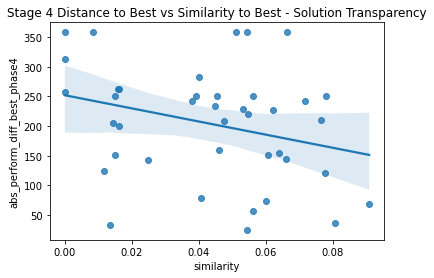

In [55]:
import seaborn as sns

sns.regplot(end['similarity'], end['abs_perform_diff_best_phase4']).set(title='Stage 4 Distance to Best vs Similarity to Best - Solution Transparency')

In [56]:
group2_phase3 = group2[['Student', 'abs_perform_diff_best_phase3']]

In [57]:
end = pd.merge(bogota2_phase3_high_compare, group2_phase3[['Student', 'abs_perform_diff_best_phase3']], how='left', left_on=['user2'], right_on =['Student'])
end

,user1,user2,user1_phase,user2_phase,similarity,Student,abs_perform_diff_best_phase3
0,fabianr23,jusherrerama,3,4,0.051020,jusherrerama,238.33
1,fabianr23,bdvegat,3,4,0.008547,bdvegat,263.33
2,fabianr23,Phoenixest,3,4,0.036145,Phoenixest,263.33
3,fabianr23,HashNick,3,4,0.045082,HashNick,255.00
4,fabianr23,ccvacad,3,4,0.092199,ccvacad,358.33
5,fabianr23,joaortizro,3,4,0.063830,joaortizro,53.33
6,fabianr23,juasmartinezbel,3,4,0.063670,juasmartinezbel,65.00
7,fabianr23,mdbelloc,3,4,0.072000,mdbelloc,225.00
8,fabianr23,diegocruz10,3,4,0.076923,diegocruz10,246.66
9,fabianr23,crarojasca,3,4,0.000000,crarojasca,313.33


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Stage 3 Distance to Best vs Similarity to Best - Solution Transparency')]

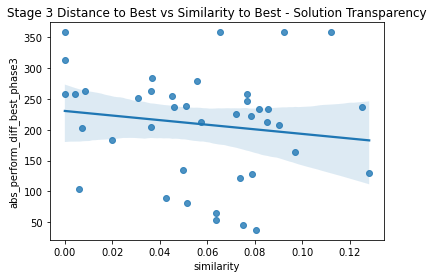

In [58]:
import seaborn as sns

sns.regplot(end['similarity'], end['abs_perform_diff_best_phase3']).set(title='Stage 3 Distance to Best vs Similarity to Best - Solution Transparency')

In [59]:
group2_phase2 = group2[['Student', 'abs_perform_diff_best_phase2']]

In [60]:
end = pd.merge(bogota2_phase2_high_compare, group2_phase2[['Student', 'abs_perform_diff_best_phase2']], how='left', left_on=['user2'], right_on =['Student'])
end

,user1,user2,user1_phase,user2_phase,similarity,Student,abs_perform_diff_best_phase2
0,fabianr23,jusherrerama,2,3,0.093750,jusherrerama,168.33
1,fabianr23,bdvegat,2,3,0.129412,bdvegat,235.00
2,fabianr23,Phoenixest,2,3,0.060000,Phoenixest,218.33
3,fabianr23,HashNick,2,3,0.068376,HashNick,221.67
4,fabianr23,ccvacad,2,3,0.000000,ccvacad,317.50
5,fabianr23,joaortizro,2,3,0.098361,joaortizro,61.67
6,fabianr23,juasmartinezbel,2,3,0.073864,juasmartinezbel,33.33
7,fabianr23,mdbelloc,2,3,0.086022,mdbelloc,205.00
8,fabianr23,diegocruz10,2,3,0.097826,diegocruz10,201.67
9,fabianr23,crarojasca,2,3,0.000000,crarojasca,272.50


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Stage 2 Distance to Best vs Similarity to Best - Solution Transparency')]

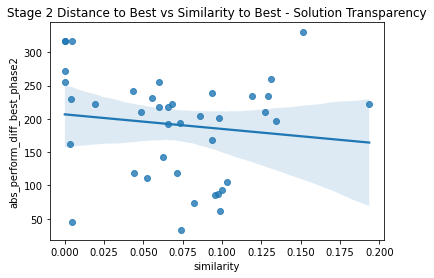

In [61]:
import seaborn as sns

sns.regplot(end['similarity'], end['abs_perform_diff_best_phase2']).set(title='Stage 2 Distance to Best vs Similarity to Best - Solution Transparency')

In [62]:
group2_phase1 = group2[['Student', 'abs_perform_diff_best_phase1']]

In [63]:
end = pd.merge(bogota2_phase1_high_compare, group2_phase1[['Student', 'abs_perform_diff_best_phase1']], how='left', left_on=['user2'], right_on =['Student'])
end

,user1,user2,user1_phase,user2_phase,similarity,Student,abs_perform_diff_best_phase1
0,xdanielsb,jusherrerama,1,2,0.022599,jusherrerama,177.50
1,xdanielsb,bdvegat,1,2,0.054187,bdvegat,260.00
2,xdanielsb,Phoenixest,1,2,0.017964,Phoenixest,185.83
3,xdanielsb,HashNick,1,2,0.023697,HashNick,260.00
4,xdanielsb,ccvacad,1,2,0.000000,ccvacad,260.00
5,xdanielsb,joaortizro,1,2,0.041420,joaortizro,152.50
6,xdanielsb,juasmartinezbel,1,2,0.034884,juasmartinezbel,8.33
7,xdanielsb,mdbelloc,1,2,0.028302,mdbelloc,168.33
8,xdanielsb,diegocruz10,1,2,0.028302,diegocruz10,169.17
9,xdanielsb,crarojasca,1,2,0.000000,crarojasca,215.00


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Stage 1 Distance to Best vs Similarity to Best - Solution Transparency')]

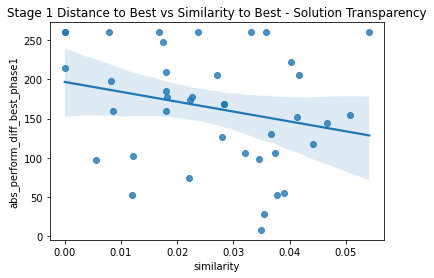

In [64]:
import seaborn as sns

sns.regplot(end['similarity'], end['abs_perform_diff_best_phase1']).set(title='Stage 1 Distance to Best vs Similarity to Best - Solution Transparency')

## Performance distance vs similarity to template

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 1 Distance to Best vs Similarity to Template - Full Transparency')]

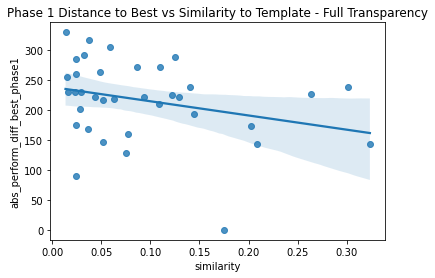

In [65]:
group3_phase1 = group3[['Student', 'abs_perform_diff_best_phase1']]
end = pd.merge(phase2_group3, group3_phase1[['Student', 'abs_perform_diff_best_phase1']], how='left', left_on=['user1'], right_on =['Student'])
sns.regplot(end['similarity'], end['abs_perform_diff_best_phase1']).set(title='Phase 1 Distance to Best vs Similarity to Template - Full Transparency')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 2 Distance to Best vs Similarity to Template - Full Transparency')]

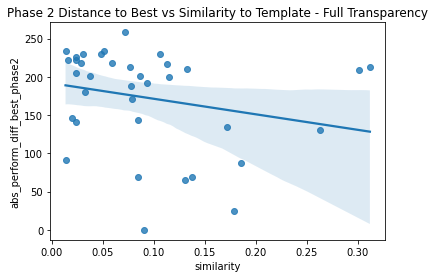

In [66]:
group3_phase2 = group3[['Student', 'abs_perform_diff_best_phase2']]
end = pd.merge(phase3_group3, group3_phase2[['Student', 'abs_perform_diff_best_phase2']], how='left', left_on=['user1'], right_on =['Student'])
sns.regplot(end['similarity'], end['abs_perform_diff_best_phase2']).set(title='Phase 2 Distance to Best vs Similarity to Template - Full Transparency')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 3 Distance to Best vs Similarity to Template - Full Transparency')]

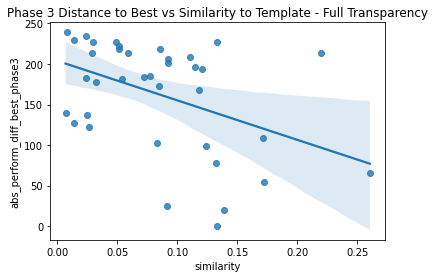

In [67]:
group3_phase3 = group3[['Student', 'abs_perform_diff_best_phase3']]
end = pd.merge(phase4_group3, group3_phase3[['Student', 'abs_perform_diff_best_phase3']], how='left', left_on=['user1'], right_on =['Student'])
sns.regplot(end['similarity'], end['abs_perform_diff_best_phase3']).set(title='Phase 3 Distance to Best vs Similarity to Template - Full Transparency')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 4 Distance to Best vs Similarity to Template - Full Transparency')]

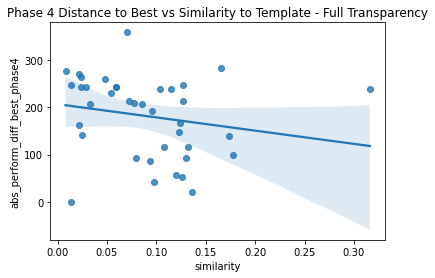

In [68]:
group3_phase4 = group3[['Student', 'abs_perform_diff_best_phase4']]
end = pd.merge(phase5_group3, group3_phase4[['Student', 'abs_perform_diff_best_phase4']], how='left', left_on=['user1'], right_on =['Student'])
sns.regplot(end['similarity'], end['abs_perform_diff_best_phase4']).set(title='Phase 4 Distance to Best vs Similarity to Template - Full Transparency')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 1 Distance to Best vs Similarity to Template - Solution Transparency')]

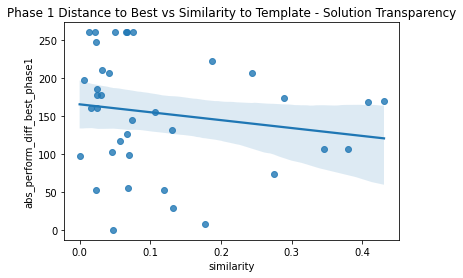

In [69]:
group2_phase1 = group2[['Student', 'abs_perform_diff_best_phase1']]
end = pd.merge(phase2_group2, group2_phase1[['Student', 'abs_perform_diff_best_phase1']], how='left', left_on=['user1'], right_on =['Student'])
sns.regplot(end['similarity'], end['abs_perform_diff_best_phase1']).set(title='Phase 1 Distance to Best vs Similarity to Template - Solution Transparency')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 2 Distance to Best vs Similarity to Template - Solution Transparency')]

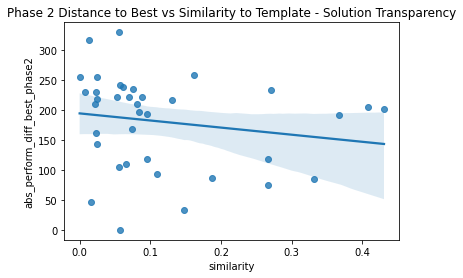

In [70]:
group2_phase2 = group2[['Student', 'abs_perform_diff_best_phase2']]
end = pd.merge(phase3_group2, group2_phase2[['Student', 'abs_perform_diff_best_phase2']], how='left', left_on=['user1'], right_on =['Student'])
sns.regplot(end['similarity'], end['abs_perform_diff_best_phase2']).set(title='Phase 2 Distance to Best vs Similarity to Template - Solution Transparency')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 3 Distance to Best vs Similarity to Template - Solution Transparency')]

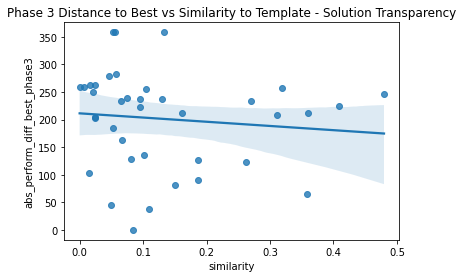

In [71]:
group2_phase3 = group2[['Student', 'abs_perform_diff_best_phase3']]
end = pd.merge(phase4_group2, group2_phase3[['Student', 'abs_perform_diff_best_phase3']], how='left', left_on=['user1'], right_on =['Student'])
sns.regplot(end['similarity'], end['abs_perform_diff_best_phase3']).set(title='Phase 3 Distance to Best vs Similarity to Template - Solution Transparency')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 4 Distance to Best vs Similarity to Template - Solution Transparency')]

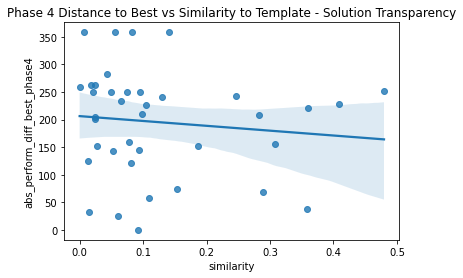

In [72]:
group2_phase4 = group2[['Student', 'abs_perform_diff_best_phase4']]
end = pd.merge(phase5_group2, group2_phase4[['Student', 'abs_perform_diff_best_phase4']], how='left', left_on=['user1'], right_on =['Student'])
sns.regplot(end['similarity'], end['abs_perform_diff_best_phase4']).set(title='Phase 4 Distance to Best vs Similarity to Template - Solution Transparency')


## Absolute total performance score vs similarity to the best 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 1 Total Performance Score vs Similarity to Best - Full Transparency')]

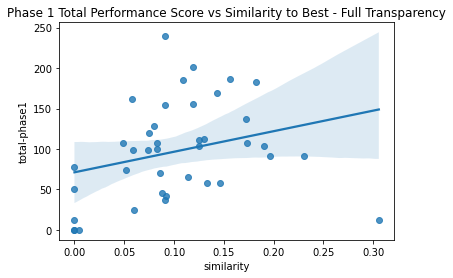

In [73]:
group3_phase1_total = bogota3[['Student', 'total-phase1']]
end = pd.merge(bogota3_phase1_high_compare, group3_phase1_total[['Student', 'total-phase1']], how='left', left_on=['user2'], right_on =['Student'])
sns.regplot(end['similarity'], end['total-phase1']).set(title='Phase 1 Total Performance Score vs Similarity to Best - Full Transparency')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 2 Total Performance Score vs Similarity to Best - Full Transparency')]

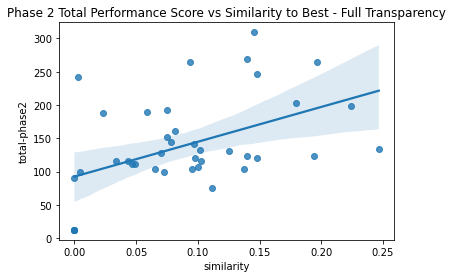

In [74]:
group3_phase2_total = bogota3[['Student', 'total-phase2']]
end = pd.merge(bogota3_phase2_high_compare, group3_phase2_total[['Student', 'total-phase2']], how='left', left_on=['user2'], right_on =['Student'])
sns.regplot(end['similarity'], end['total-phase2']).set(title='Phase 2 Total Performance Score vs Similarity to Best - Full Transparency')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 3 Total Performance Score vs Similarity to Best - Full Transparency')]

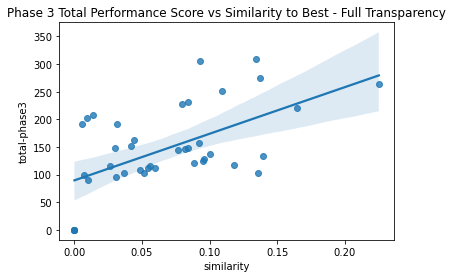

In [75]:
group3_phase3_total = bogota3[['Student', 'total-phase3']]
end = pd.merge(bogota3_phase3_high_compare, group3_phase3_total[['Student', 'total-phase3']], how='left', left_on=['user2'], right_on =['Student'])
sns.regplot(end['similarity'], end['total-phase3']).set(title='Phase 3 Total Performance Score vs Similarity to Best - Full Transparency')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 4 Total Performance Score vs Similarity to Best - Full Transparency')]

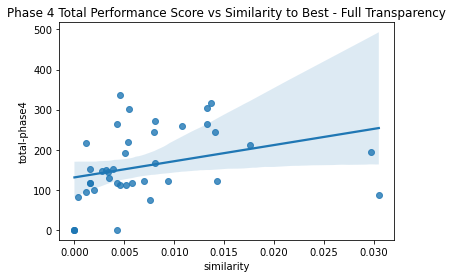

In [76]:
group3_phase4_total = bogota3[['Student', 'total-phase4']]
end = pd.merge(bogota3_phase4_high_compare, group3_phase4_total[['Student', 'total-phase4']], how='left', left_on=['user2'], right_on =['Student'])
sns.regplot(end['similarity'], end['total-phase4']).set(title='Phase 4 Total Performance Score vs Similarity to Best - Full Transparency')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase 4 Total Performance Score vs Similarity to Best - Full Transparency')]

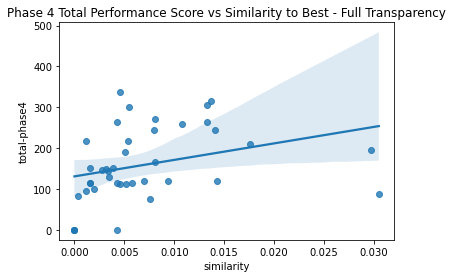

In [77]:
sns.regplot(end['similarity'], end['total-phase4']).set(title='Phase 4 Total Performance Score vs Similarity to Best - Full Transparency')



## Distribution of Performance Distance to the Best Full Transparency

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='abs_perform_diff_best_phase1', ylabel='Density'>

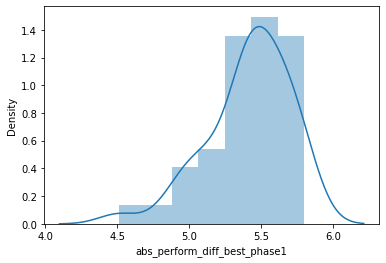

In [78]:
# concatenate
group3 = group3[group3['abs_perform_diff_best_phase1'] != 0]
sns.distplot(np.log(group3['abs_perform_diff_best_phase1'] + 1))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='abs_perform_diff_best_phase2', ylabel='Density'>

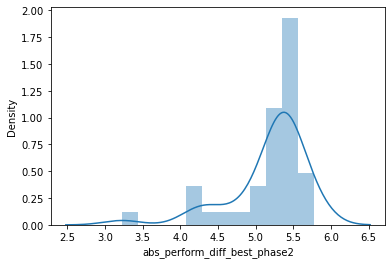

In [79]:
group3 = group3[group3['abs_perform_diff_best_phase2'] != 0]
sns.distplot(np.log(group3['abs_perform_diff_best_phase2'] + 1))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='abs_perform_diff_best_phase3', ylabel='Density'>

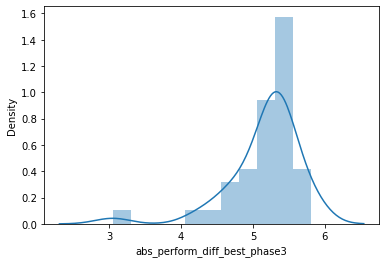

In [80]:
group3 = group3[group3['abs_perform_diff_best_phase3'] != 0]
sns.distplot(np.log(group3['abs_perform_diff_best_phase3'] + 1))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='abs_perform_diff_best_phase4', ylabel='Density'>

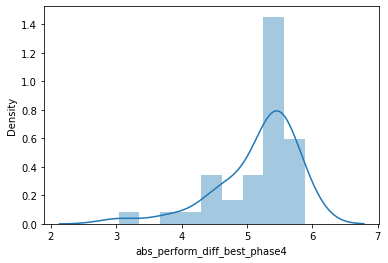

In [81]:
group3 = group3[group3['abs_perform_diff_best_phase4'] != 0]
sns.distplot(np.log(group3['abs_perform_diff_best_phase4']))

In [82]:
b3_p1 = np.log(group3['abs_perform_diff_best_phase1']).mean()
b3_p2 = np.log(group3['abs_perform_diff_best_phase2']).mean()
b3_p3 = np.log(group3['abs_perform_diff_best_phase3']).mean()
b3_p4 = np.log(group3['abs_perform_diff_best_phase4']).mean()

In [83]:
group2 = group2[group2['abs_perform_diff_best_phase1'] != 0]
group2 = group2[group2['abs_perform_diff_best_phase2'] != 0]
group2 = group2[group2['abs_perform_diff_best_phase3'] != 0]
group2 = group2[group2['abs_perform_diff_best_phase4'] != 0]
b2_p1 = np.log(group2['abs_perform_diff_best_phase1']).mean()
b2_p2 = np.log(group2['abs_perform_diff_best_phase2']).mean()
b2_p3 = np.log(group2['abs_perform_diff_best_phase3']).mean()
b2_p4 = np.log(group2['abs_perform_diff_best_phase4']).mean()

In [84]:
group1 = group1[group1['abs_perform_diff_best_phase1'] != 0]
group1 = group1[group1['abs_perform_diff_best_phase2'] != 0]
group1 = group1[group1['abs_perform_diff_best_phase3'] != 0]
group1 = group1[group1['abs_perform_diff_best_phase4'] != 0]
b1_p1 = np.log(group1['abs_perform_diff_best_phase1']).mean()
b1_p2 = np.log(group1['abs_perform_diff_best_phase2']).mean()
b1_p3 = np.log(group1['abs_perform_diff_best_phase3']).mean()
b1_p4 = np.log(group1['abs_perform_diff_best_phase4']).mean()

In [85]:
group0 = group0[group0['abs_perform_diff_best_phase1'] != 0]
group0 = group0[group0['abs_perform_diff_best_phase2'] != 0]
group0 = group0[group0['abs_perform_diff_best_phase3'] != 0]
group0 = group0[group0['abs_perform_diff_best_phase4'] != 0]
b0_p1 = np.log(group0['abs_perform_diff_best_phase1']).mean()
b0_p2 = np.log(group0['abs_perform_diff_best_phase2']).mean()
b0_p3 = np.log(group0['abs_perform_diff_best_phase3']).mean()
b0_p4 = np.log(group0['abs_perform_diff_best_phase4']).mean()

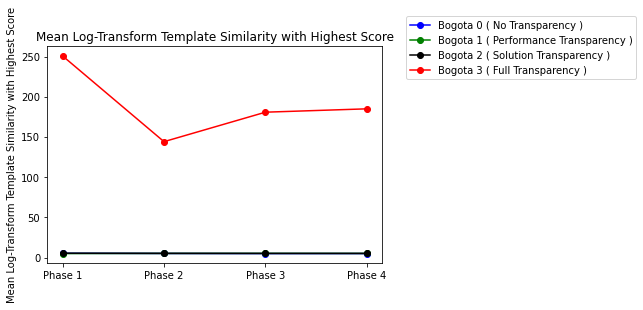

In [87]:
y1 = [b0_p1, b0_p2, b0_p3, b0_p4]
y1 = [b1_p1, b1_p2, b1_p3, b1_p4]
y2 = [b2_p1, b2_p2, b2_p3, b2_p4]
y3 = [b3_p1, b3_p2, b3_p3, b3_p4]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Log-Transform Template Similarity with Highest Score")
plt.ylabel("Mean Log-Transform Template Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)